In [105]:
import pandas as pd

#Get tuition data
df = pd.read_csv('CollegeTuitionData.csv', encoding = "ISO-8859-1", header = None)
tuitionData = pd.concat([df[0], df[4]], axis=1)

#Get salary data
df2 = pd.read_csv('salaries-by-college-type.csv', encoding = "ISO-8859-1", header = None)
df2 = df2.drop(0)
salaryData = pd.concat([df2[0], df2[1], df2[2]], axis=1)

#Get region data
df3 = pd.read_csv('salaries-by-region.csv', encoding = "ISO-8859-1", header = None)
df3 = df3.drop(0)
regionData = pd.concat([df3[0], df3[1], df3[2]], axis=1)

In [106]:
import re
colleges = list()
tuitions = list()
salaries = list()
collegeType = list()
collegeType2 = list()
regions = list()
for row in salaryData.iterrows():
    college = row[1][0]
    college = re.sub("[\(\[].*?[\)\]]", "", college)
    for row2 in tuitionData.iterrows():
        college2 = row2[1][0]
        if (college == college2):
            if (college in colleges):
                index = colleges.index(college)
                collegeType2[index] = row[1][1]
            else:
                collegeType2.append(None)
                colleges.append(college)
                tuitions.append(row2[1][4])
                salaries.append(row[1][2])
                collegeType.append(row[1][1])

In [107]:
def remove_dollarSign(s):
    s = re.sub('[, ]', '', s)
    return float(s[1:])

tuitions = [remove_dollarSign(t) for t in tuitions]
salaries = [remove_dollarSign(s) for s in salaries]

In [108]:
regionData = regionData.set_index(0)
collegesRegion = df3[0]
regions = list()
count = 0
for college in colleges:
    if (college in sorted(collegesRegion)):
        regions.append(regionData.loc[college][1])

In [109]:
collegeData = pd.DataFrame(
    {'College': colleges,
     'Tuition': tuitions,
     'Salary': salaries,
     'College Type': collegeType,
     'College Type 2': collegeType2,
     'Region': regions
    })
collegeData = collegeData.set_index('College')

In [110]:
jsonData = collegeData.to_json(orient='index')
jsonData
import json
with open('data.json', 'w') as outfile:
    outfile.write(jsonData)  

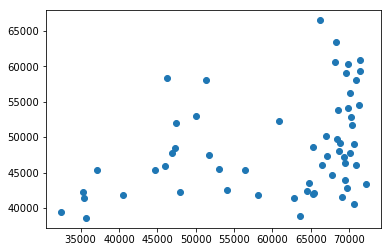

In [111]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(tuitions,salaries)
plt.show()

TypeError: unsupported operand type(s) for -: 'str' and 'float'

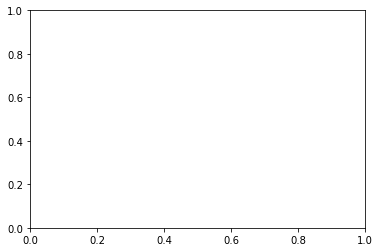

In [96]:
%matplotlib inline
plt.bar(regions,tuitions)
plt.show()

In [97]:
collegeData

,College Type,College Type 2,Region,Salary,Tuition
College,,,,,
Amherst College,Liberal Arts,None,Northeastern,5450000.0,71240.0
Auburn University,State,None,Southern,4540000.0,44691.0
Bates College,Liberal Arts,None,Northeastern,4730000.0,67080.0
Bowdoin College,Liberal Arts,None,Northeastern,4810000.0,68619.0
Brown University,Ivy League,None,Northeastern,5620000.0,70137.0
Bucknell University,Liberal Arts,None,Northeastern,5410000.0,69821.0
Clemson University,State,None,Southern,4840000.0,47247.0
Colby College,Liberal Arts,None,Northeastern,4640000.0,69451.0
Colgate University,Liberal Arts,None,Northeastern,5280000.0,70200.0
